<a href="https://colab.research.google.com/github/remijul/tutorial/blob/master/Clustering_Part_1_K_means_and_PCA_on_simulated_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering with K-means and PCA reduction  
Clustering / Segmentation of simulated data with scikit-learn.
Visualisation of reduced data and clusters based on PCA' dimension reduction.  
---

## Objectives


Understand one of the main clustering algorithms and be ready for praticing.  
Practice k-means algorithm to make cluster with iris dataset.

## 1.Librairies

In [25]:
# Libraries for maths and dataviz
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Module for dataset
from sklearn.datasets import make_blobs

# Module for K-means algorithm
from sklearn.cluster import KMeans

# Module for metrics : evaluation of the ML models
from sklearn import metrics

# PCA
from sklearn.preprocessing import scale
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

## 2.Simulated data

In [26]:
# Make sample data
X, label_true = make_blobs(n_samples=300, centers=5, n_features=8, random_state=0)
print(X.shape)

# Count samples by cluster
values, counts = np.unique(label_true, return_counts=True)
print(values)
print(counts)

(300, 8)
[0 1 2 3 4]
[60 60 60 60 60]


## 3.K-means Clustering


In [27]:
silhouette = []
K = range(2,10)

for k in K:
  #Build / Fit the model
  model_kmean = KMeans(n_clusters=k).fit(X)

  # Labels of clusters
  labels = model_kmean.labels_

  # Store inertia in a list
  silhouette.append(metrics.silhouette_score(X, labels, metric='euclidean'))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

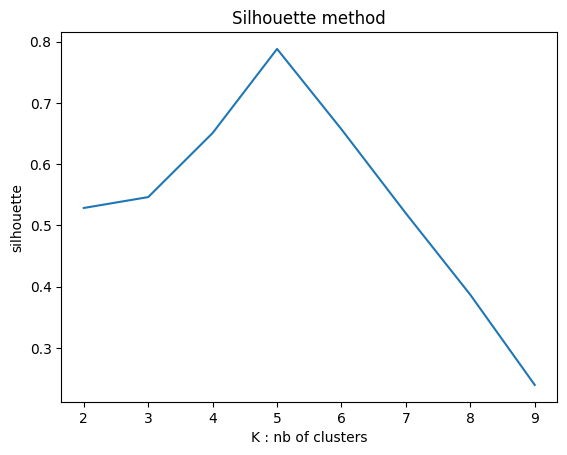

In [28]:
plt.title("Silhouette method")
plt.xlabel("K : nb of clusters")
plt.ylabel("silhouette")
plt.plot(K, silhouette)
plt.show()

## 4.Visualisation

### Dimension reduction with PCA

In [29]:
# Standardisation
X_scaled = scale(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# PCA results
print(pca.explained_variance_ratio_)

# PCA coordinates for cluster centers
cluster_center_pca = pca.transform(cluster_center)

[0.47913621 0.2619533  0.13713059 0.09749081 0.00815814 0.00764015
 0.004976   0.00351479]


### Final K-means model on reduced data

In [30]:
# Model
model_kmean5_pca = KMeans(n_clusters=5).fit(X_pca)

# Cluster centers
cluster_center_pca = model_kmean5_pca.cluster_centers_
print(cluster_center_pca)

# Cluster labels
cluster_label_pca = model_kmean5_pca.fit_predict(X)
print(cluster_label_pca)

[[-5.82417894e-01 -1.51547743e+00 -1.44834047e+00 -7.76486842e-01
   3.39393262e-02  7.15050759e-03  5.33952676e-03 -6.76028849e-03]
 [-1.48469339e+00  2.57350753e+00 -3.67036068e-01 -1.59023925e-01
  -2.20195702e-02 -1.30218802e-04  1.84930640e-02  1.64546204e-02]
 [ 3.67081652e+00  4.07602550e-01  4.08378921e-01 -3.80507429e-01
   2.54877078e-02 -1.83975145e-02 -6.91064064e-04 -5.19149434e-03]
 [ 9.67840867e-02 -5.52766038e-01 -2.58508029e-01  1.66039967e+00
  -5.36403031e-02  2.59063698e-02  1.15613126e-02 -1.41606666e-02]
 [-1.70048933e+00 -9.12866612e-01  1.66550565e+00 -3.44381474e-01
   1.62328393e-02 -1.45291440e-02 -3.47028392e-02  9.65782902e-03]]
[3 3 2 4 3 2 3 3 4 0 2 1 2 0 3 0 3 2 0 0 1 3 2 2 0 4 2 2 3 0 0 1 4 4 1 3 0
 3 4 2 0 4 0 1 2 0 2 1 3 3 4 0 0 1 4 1 4 2 3 4 1 4 0 1 2 3 4 3 0 1 3 2 1 3
 0 3 2 0 1 0 0 1 3 3 3 4 4 2 3 1 3 4 2 2 0 4 0 0 1 2 2 2 3 3 4 2 0 4 0 0 4
 4 0 0 1 1 1 0 3 1 3 1 4 3 2 4 4 1 3 0 4 4 3 4 3 1 4 1 2 1 4 4 2 3 4 2 2 3
 0 3 4 0 4 2 1 3 3 2 3 2 0 0 3 1 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot original data and clusters

<ipython-input-31-4c3c48035f24>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(1,2,1)


Text(0.5, 1.0, 'Clustered data')

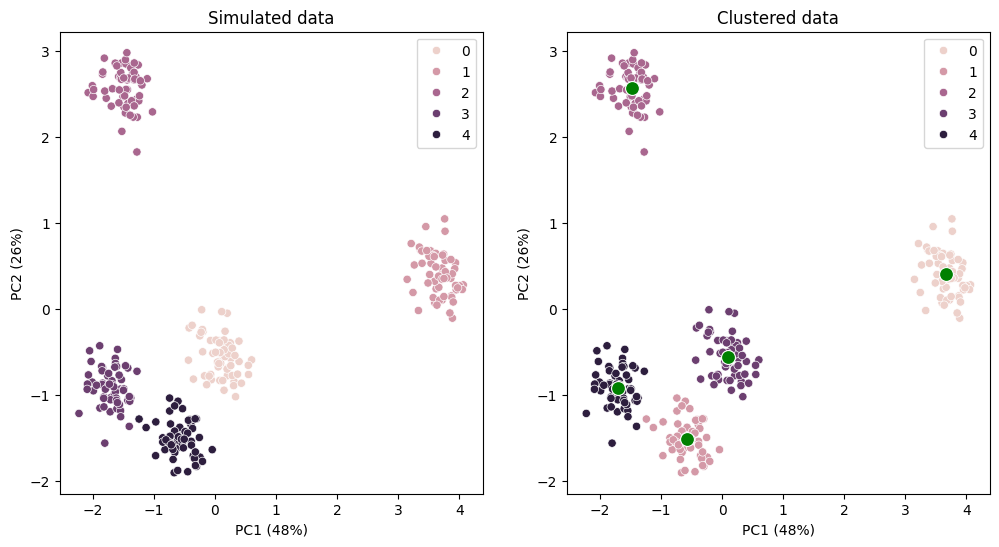

In [31]:
fig, axs = plt.subplots(figsize=(12,6))

# Viz of Simulated data
ax1 = plt.subplot(1,2,1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = label_true)
plt.xlabel("PC1 (48%)")
plt.ylabel("PC2 (26%)")
plt.title("Simulated data")

# Viz of clusters
ax2 = plt.subplot(1,2,2)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue = cluster_label_pca)
sns.scatterplot(x=cluster_center_pca[:, 0], y=cluster_center_pca[:, 1], color='green', s=100)
plt.xlabel("PC1 (48%)")
plt.ylabel("PC2 (26%)")
plt.title("Clustered data")